##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 5 Report

## Group Members: Samuel Cormier, Garrett Tashiro

In [64]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import dynworm as dw

## Exercise 1: Visualize brain connectomes

<img src="lab5_exercise1.png" width="1000">

In [65]:
# Load synaptic connectome and neuron classes

celegans_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
celegans_syn_conn_np = np.array(celegans_syn_conn_pd)

# Classes are ordered according to the neurons' order in synaptic connectome
neuron_classes = np.load('neuron_classes.npy') 

In [66]:
# Adjacency matrix of the first 10 neurons
print(celegans_syn_conn_np[:10, :10])

[[0 0 0 3 0 0 7 0 0 0]
 [0 0 1 0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [67]:
# Neuron classes of the first 10 neurons
print(neuron_classes[:10])

['sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory'
 'sensory' 'sensory' 'sensory']


In [68]:
def vis_conn(syn_conn, neuron_classes):
    
    # YOUR CODE HERE
    # The function should output a 1 x 3 subplot
    # For each subplot, make sure to set plt.ylim(len(sub_adjacency_matrix), 0) so that first row starts with neuron 0
    # Add appropriate x,y labels for each subplot (e.g. sensory vs sensory, inter vs inter, etc)
    
    # list of the 3 synapse types
    syn_types = ['sensory','inter','motor']
    
    # list that will match neuron_classes in length after a for loop.
    # the purpose is to preserve the order of each synapse type.
    # for instance if the 5th entry in neuron_classes was the first time
    # that a motor synapse occurs then at index 4 in this list a value of 0 would be added.
    syn_type_order = []
    
    # synapse counters initialized
    syn_count = 0
    int_count = 0
    mot_count = 0
    
    # synapse counters added to list for ease of use in for loop
    syn_type_count = [syn_count, \
                      int_count, \
                      mot_count ]
    
    # for loop checks type of each entry in neuron_classes and adds to the respective counter for synapse type
    for i in range(0, len(neuron_classes)):
        t = syn_types.index(neuron_classes[i])
        syn_type_order.append(syn_type_count[t])
        syn_type_count[t] = syn_type_count[t] + 1
        
    # creates arrays for each synapse type. the size is taken from syn_type_count
    # this ensures that all rows and columns will have at least one non-zero entry (matrix is not sparse)
    syn_type_arr = [np.zeros((int(syn_type_count[0]),int(syn_type_count[0]))), \
                    np.zeros((int(syn_type_count[1]),int(syn_type_count[1]))), \
                    np.zeros((int(syn_type_count[2]),int(syn_type_count[2])))]
    
    # iterates over each row of syn_conn, the main 279x279 array.
    # when a non-zero value is found, the synapse type is checked
    # for both row and column index. matching synapse types are added
    # to their respective sub-networks. the placement in the subnetworks 
    # is given via syn_type_order
    for i in range(0, len(syn_conn)):
        for j in range(0, len(syn_conn[i])):
            # eliminates sparseness. all columns and rows have at least one non-zero entry
            if syn_conn[i][j] != 0:
                # ensures only subnetwork edges are included (edges between two synapses of same type)
                if neuron_classes[i] == neuron_classes[j]:
                    syn_type_arr[syn_types.index(neuron_classes[i])][syn_type_order[i],syn_type_order[j]] = syn_conn[i,j]
                
    
    # Create a figure and make it size 18x6 
    fig = plt.figure(figsize=(18,6))
    
    # Subplot if column 1 of row 1
    # plt.pcolor() to vizualize the adj. matrix
    # ylim changes are to make the first row start with vertex 0
    # Label x and y axis and change the font size to be readable
    # Change the tick size for x and y axis
    plt.subplot(1, 3, 1)
    plt.pcolor(syn_type_arr[0], cmap = 'Greys', vmin = 0, vmax = 1)
    plt.ylim(len(syn_type_arr[0]), 0)
    plt.xlabel(syn_types[0], fontsize = 18)
    plt.ylabel(syn_types[0], fontsize = 18)
    plt.xticks(fontsize=14)                                         
    plt.yticks(fontsize=14)
    
    # Subplot if column 2 of row 1
    # plt.pcolor() to vizualize the adj. matrix
    # ylim changes are to make the first row start with vertex 0
    # Label x and y axis and change the font size to be readable
    # Change the tick size for x and y axis
    plt.subplot(1, 3, 2)
    plt.pcolor(syn_type_arr[1], cmap = 'Greys', vmin = 0, vmax = 1)
    plt.ylim(len(syn_type_arr[1]), 0)
    plt.xlabel(syn_types[1], fontsize = 18)
    plt.ylabel(syn_types[1], fontsize = 18)
    plt.xticks(fontsize=14)                                         
    plt.yticks(fontsize=14)
    
    # Subplot if column 3 of row 1
    # plt.pcolor() to vizualize the adj. matrix
    # ylim changes are to make the first row start with vertex 0
    # Label x and y axis and change the font size to be readable
    # Change the tick size for x and y axis
    plt.subplot(1, 3, 3)
    plt.pcolor(syn_type_arr[2], cmap = 'Greys', vmin = 0, vmax = 1)
    plt.ylim(len(syn_type_arr[2]), 0)
    plt.xlabel(syn_types[2], fontsize = 18)
    plt.ylabel(syn_types[2], fontsize = 18)
    plt.xticks(fontsize=14)                                         
    plt.yticks(fontsize=14)

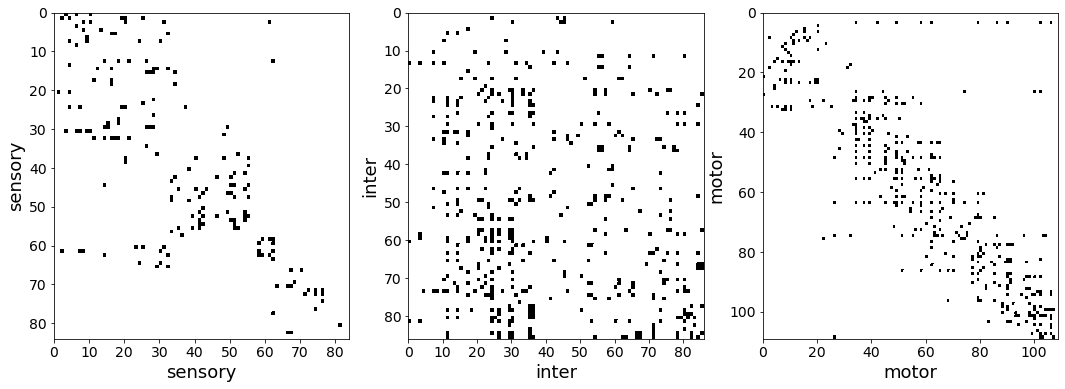

In [69]:
# Test your function here

vis_conn(syn_conn = celegans_syn_conn_np, neuron_classes = neuron_classes)

## Exercise 2: Locating the most connected vertices

<img src="lab5_exercise2.png" width="1000">

In [70]:
# Load the synaptic connectome and sample social network

syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
syn_conn_np = np.array(syn_conn_pd)

social_network_sample_pd = pd.read_excel('social_network_sample.xlsx')
social_network_sample_np = np.array(social_network_sample_pd)

In [71]:
def find_hub_vertices(adj_mat, num_vertices):
    
    # calculate sum along columns for total in-degree
    # calculate sum along rows for total out-degree
    
    # initialize list that will hold total sum of in and out edges for every vertex
    in_degree_unordered, out_degree_unordered = [], []
    
    # for loop to calculate sum along rows and columns for every vertex
    for i in range(0, len(adj_mat)):
        in_degree_unordered.append(np.sum(adj_mat[:,i]))
        out_degree_unordered.append(np.sum(adj_mat[i]))
        
    # initializing lists to be returned. np.argsort() places higher values on higher indices so
    # the sub_array is taken from the end of the original. np.flip() is used to put the higher
    # values of the sub-array first before the lower ones.
    indegree_list = np.flip(np.argsort(in_degree_unordered)[-num_vertices:]) 
    outdegree_list = np.flip(np.argsort(out_degree_unordered)[-num_vertices:])
    
    return indegree_list, outdegree_list

In [72]:
# Test your function with synaptic connectome

indegree_list_syn_conn, outdegree_list_syn_conn = find_hub_vertices(adj_mat = syn_conn_np, num_vertices = 10)

In [73]:
print(indegree_list_syn_conn)

[105 214 195 231  48  96 181 253  58 163]


In [74]:
print(outdegree_list_syn_conn)

[ 56  48 261  64 253 267  15   7 172 244]


In [75]:
# Test your function with sample social media network

indegree_list_SN, outdegree_list_SN = find_hub_vertices(adj_mat = social_network_sample_np, num_vertices = 5)

In [76]:
print(indegree_list_SN)

[31 62 43 93 53]


In [77]:
print(outdegree_list_SN)

[ 1 99 26 19 49]


## Exercise 3: Removing vertices from a graph

<img src="lab5_exercise3.png" width="1000">

In [78]:
# We will use the pre-existing directed graph sample earlier in the lab

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [79]:
def remove_vertices(adj_mat, vertices_2b_removed):
  
    # Create a new copy of the adj_matrix uspying np.copy()
    adj_mat_new = np.copy(adj_mat)
    
    # Have a nested for loop. The outer loop
    # traveres the list of verticies that are being 
    # removed, and the inner for loop is is to go 
    # through the adj. matrix. Go through each row
    # and column in the matrix and set the edge weights
    # to be 0 to remove the verticies.
    for i in range(0, len(vertices_2b_removed)):
        for j in range(0, len(adj_mat)):
            adj_mat_new[j,vertices_2b_removed[i]] = 0
            adj_mat_new[vertices_2b_removed[i], j] = 0
   
    return adj_mat_new

In [80]:
vertices_2b_removed_1 = [0, 5]        # Vertices to be removed set 1
vertices_2b_removed_2 = [1, 2, 6]     # Vertices to be removed set 2

In [81]:
# Test your function with set 1

directed_adj_mat_new_1 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_1)

In [82]:
# Test your function with set 2

directed_adj_mat_new_2 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_2)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

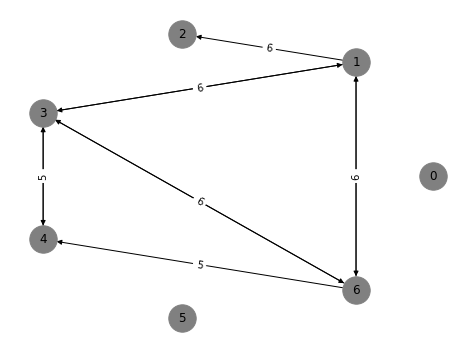

In [83]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_1
# Use circular graph layout
# Label your edges according to their weights

# Use plt.figure() to change the size of the figure so 
# some of the vertices are chopped off
fig1 = plt.figure(figsize = (8, 6))

# Convert the numpy array into directed graph networkX object
# for the first adj mat
graph1_nx = nx.from_numpy_array(directed_adj_mat_new_1, create_using=nx.DiGraph())

# Get the positions of the vertices 
pos1 = nx.circular_layout(graph1_nx)

# Use nx.draw_networkx() function to plot the directed graph
nx.draw_networkx(graph1_nx, pos1, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() function to get the edge weights for the vertices
labels = nx.get_edge_attributes(graph1_nx, 'weight')

# nx.draw_networkx_edge_labels() for labeling each of the edges 
# with the corresponding weights
nx.draw_networkx_edge_labels(graph1_nx, pos1, edge_labels = labels)

plt.axis('off')
plt.show()

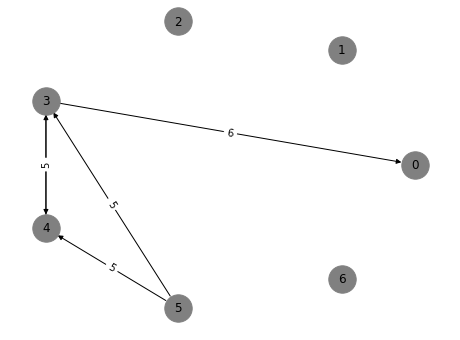

In [84]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_2
# Use circular graph layout
# Label your edges according to their weights

# Use plt.figure() to change the size of the figure so 
# some of the vertices are chopped off
fig2 = plt.figure(figsize = (8, 6))

# Convert the numpy array into directed graph networkX object
# for the second adj mat
graph2_nx = nx.from_numpy_array(directed_adj_mat_new_2, create_using=nx.DiGraph())

# Get the positions of the vertices 
pos2 = nx.circular_layout(graph2_nx)

# Use nx.draw_networkx() function to plot the directed graph
nx.draw_networkx(graph2_nx, pos2, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() function to get the edge weights for the vertices
labels = nx.get_edge_attributes(graph2_nx,'weight')

# nx.draw_networkx_edge_labels() for labeling each of the edges 
# with the corresponding weights
nx.draw_networkx_edge_labels(graph2_nx, pos2, edge_labels = labels)

plt.axis('off')
plt.show()

## Exercise 4: Adding a new vertex to a graph

<img src="lab5_exercise4.png" width="1000">

In [85]:
# We will use the pre-existing directed graph sample earlier in the lab
# The graph has 7 vertices

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [86]:
def add_vertex(adj_mat, outgoing_edges, incoming_edges):
    
    # The original directed graph has 7 vertices
    # The new vertex to be added can be regarded as 8th vertex of the graph
    # You can assume that each edge being added has weight of 1

    # Create a new matrix of zeros that is larger by 1 row and column
    adj_mat_new = np.zeros((len(adj_mat) + 1, len(adj_mat) + 1), dtype = 'int16')
    
    # Add the original matrix to the the new larger maxtrix
    # with a nested for loop to travers the rows and columns
    for i in range(0, len(adj_mat)):
        for j in range(0, len(adj_mat)):
            adj_mat_new[i][j] = adj_mat[i][j]
    
    # Add edges and arbitrary weights of 1 for 
    # the new vertex: incoming and out going
    for i in range(0, len(incoming_edges)):
        adj_mat_new[len(adj_mat_new) - 1, incoming_edges[i]] = 1
        adj_mat_new[outgoing_edges[i], len(adj_mat_new) - 1] = 1
    
    return adj_mat_new

In [87]:
# Define outgoing and incoming edges for the new vertex to be added

outgoing_edges = [2, 3, 5]
incoming_edges = [3, 4, 6]

In [88]:
# Test your function with provided list of outgoing/incoming edges

directed_adj_mat_vertex_added = add_vertex(adj_mat = directed_adj_mat_np, 
                                  outgoing_edges = outgoing_edges, 
                                  incoming_edges = incoming_edges)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

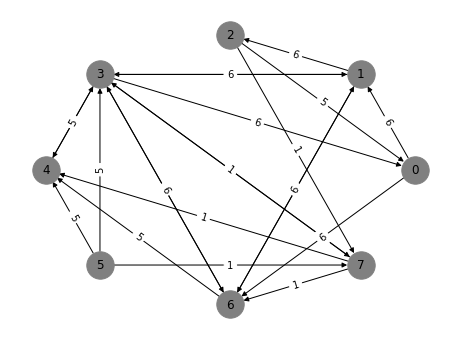

In [89]:
# Using networkX, plot your directed graph with added vertices according to outgoing_edges and incoming_edges
# Use circular graph layout
# Label your edges according to their weights

# Use plt.figure() to change the size of the figure so 
# some of the vertices are chopped off
fig3 = plt.figure(figsize = (8, 6))

# Convert the numpy array into directed graph networkX object
# for the second adj mat
graph3_nx = nx.from_numpy_array(directed_adj_mat_vertex_added, create_using=nx.DiGraph())

# Get the positions of the vertices 
pos3 = nx.circular_layout(graph3_nx)

# Use nx.draw_networkx() function to plot the directed graph
nx.draw_networkx(graph3_nx, pos3, with_labels = True, node_size = 750, node_color='grey')

# Use nx.get_edge_attributes() function to get the edge weights for the vertices
labels = nx.get_edge_attributes(graph3_nx,'weight')

# nx.draw_networkx_edge_labels() for labeling each of teh edges 
# with the corresponding weights
nx.draw_networkx_edge_labels(graph3_nx, pos3, edge_labels = labels)

plt.axis('off')
plt.show()

## Exercise 5: Re-wire neurons to restore behavior of C. elegans

<img src="lab5_exercise5.png" width="1000">

### Note: If you wish to use the included C. elegans simulation code in lab template folder outside of EE 241 (e.g. research purpose), please cite the following paper 
### Kim, J., Leahy, W., & Shlizerman, E. (2019). Neural interactome: Interactive simulation of a neuronal system. Frontiers in Computational Neuroscience, 13, 8. 

In [51]:
# Load synaptic connectome and neuron classes

damaged_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
damaged_syn_conn_np = np.array(damaged_syn_conn_pd)

## Motorneurons' activities during gentle tail touch (Damaged brain)

<img src="damaged_AVA_motor_activities.png" width="450">

## Simulated body movement during gentle tail touch (Damaged brain)

In [90]:
from ipywidgets import Video

Video.from_file("escape_response_damaged.mp4", width=500, height=500)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x06\x01umdat\x00\x…

In [91]:
# Re-wiring instructions for AVAL and AVAR neurons

outgoing_AVAL_triples = np.load('AVAL_outgoing_triples.npy') # AVAL is the 47th vertex in the graph
incoming_AVAL_triples = np.load('AVAL_incoming_triples.npy') # AVAL is the 47th vertex in the graph

outgoing_AVAR_triples = np.load('AVAR_outgoing_triples.npy') # AVAR is the 55th vertex in the graph
incoming_AVAR_triples = np.load('AVAR_incoming_triples.npy') # AVAR is the 55th vertex in the graph

# Each row in the triple is ordered as [Source neuron index, Target neuron index, Synaptic weight]

rewiring_triples_AVAL = [outgoing_AVAL_triples, incoming_AVAL_triples]
rewiring_triples_AVAR = [outgoing_AVAR_triples, incoming_AVAR_triples]

In [92]:
def rewire_neurons(damaged_synaptic_adj_matrix, rewiring_instructions_AVAL, rewiring_instructions_AVAR):
    
    # YOUR CODE HERE
    # AVAL, AVAR neurons take the indices of 47, 55 respectively in the damaged_syn_conn_np   
    
    # Make a copy of original matrix
    repaired_synaptic_adj_matrix = damaged_synaptic_adj_matrix.copy()
    
    # Each triple in rewiring_instructions_AVAL, 
    # regardless of whether it is outgoing or incoming 
    # provides source index, target index, and weight in that order,
    # making it simple to add into the copy of the original matrix
    for direction_type in rewiring_instructions_AVAL:
        for connections in direction_type:
            repaired_synaptic_adj_matrix[connections[0], connections[1]] = connections[2]

    # Each triple in rewiring_instructions_AVAR, 
    # regardless of whether it is outgoing or incoming 
    # provides source index, target index, and weight in that order,
    # making it simple to add into the copy of the original matrix
    for direction_type in rewiring_instructions_AVAR:
        for connections in direction_type:
            repaired_synaptic_adj_matrix[connections[0], connections[1]] = connections[2] 
    
    return repaired_synaptic_adj_matrix

In [93]:
repaired_synaptic_adj_matrix = rewire_neurons(damaged_synaptic_adj_matrix = damaged_syn_conn_np, 
                                              rewiring_instructions_AVAL = rewiring_triples_AVAL, 
                                              rewiring_instructions_AVAR = rewiring_triples_AVAR)

Repair operation successful! - Simulating the nervous system and body for gentle tale touch
All neurons are healthy
Network integration prep completed...
Computing network dynamics...
11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.9% completed
100.0% completed


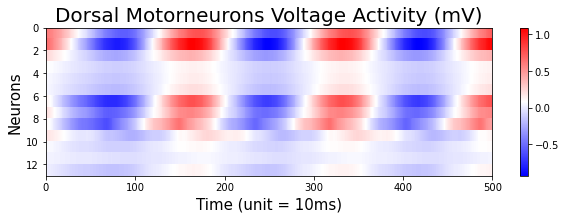

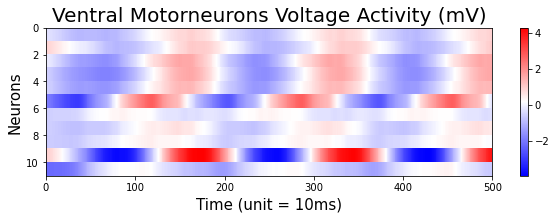

In [94]:
# Test your repaired connectome 

dw.network_sim.test_brain_repair(repaired_synaptic_adj_matrix) 

# If successfully repaired, function will output 
# 1) Motorneurons activity 
# 2) Simulated body movement video with repaired brain